# Problem Set #2
- MACS 40200, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: January 27, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special
import scipy.optimize as opt
import scipy.integrate as integrate
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Question 1

### (a)

In [2]:
data1 = np.loadtxt('clms.txt')
print('Mean    : {0:.2f}'.format(np.mean(data1)))
print('Median  : {0:.2f}'.format(np.median(data1)))
print('Max/Min : {}'.format((np.amax(data1), np.amin(data1))))
print('S.D.    : {0:.2f}'.format(np.std(data1)))

Mean    : 720.28
Median  : 172.21
Max/Min : (227967.25, 0.01)
S.D.    : 3972.66


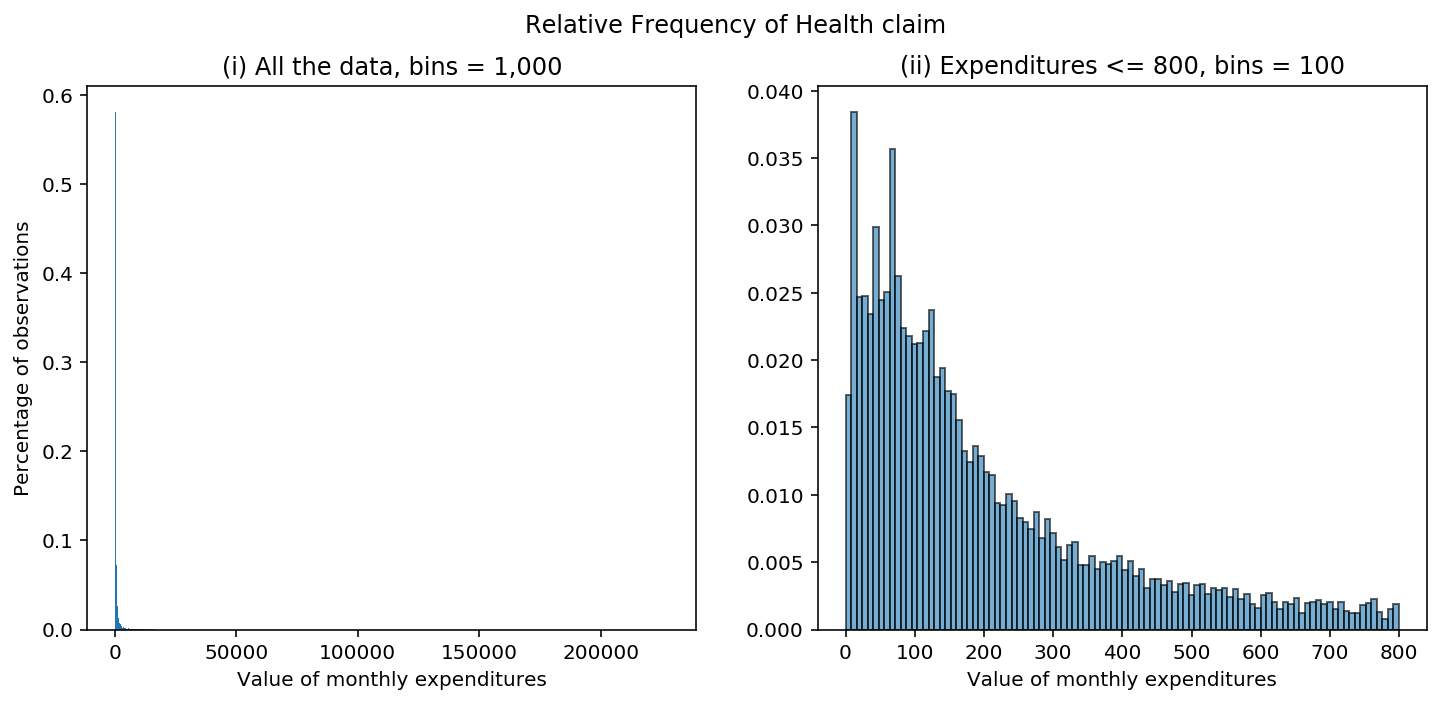

The sum of heights in Figure(i) :1.0000
The sum of heights in Figure(ii):0.8494


In [3]:
weights_all = (1/len(data1))*np.ones_like(data1)
data1_800 = data1[data1 <= 800]
weights_800 = (1/len(data1))*np.ones_like(data1_800)

fig, axes = plt.subplots(ncols = 2, figsize = (12,5))

counts_allf, bins_edge_allf, _ = axes[0].hist(data1, 1000, weights = weights_all)
axes[0].set_xlabel('Value of monthly expenditures')
axes[0].set_ylabel('Percentage of observations')
axes[0].set_title('(i) All the data, bins = 1,000')
counts_800f, bins_edge_800f, _ = axes[1].hist(data1_800, 100, weights = weights_800, edgecolor = 'k',alpha = 0.6)
axes[1].set_title('(ii) Expenditures <= 800, bins = 100')
axes[1].set_xlabel('Value of monthly expenditures')
fig.suptitle('Relative Frequency of Health claim');
plt.show();

print('The sum of heights in Figure(i) :{0:.4f}'.format(counts_allf.sum()))
print('The sum of heights in Figure(ii):{0:.4f}'.format(counts_800f.sum()))


Since the distribution of health expenditures is extremely skewed, The first plot (left one) gives nothing about the structure of the health expenditure in this dataset. Thus, it would be better to use the right one to observe the distribution.

Note: Those plots above show the relative frequency but do not show the relative frequency density (That is, the area of Figure(i) is not equal to 1.0). I think it is better to use the relative frequency density plots as showing below for overlaying the probability density function in the following questions as showing below.

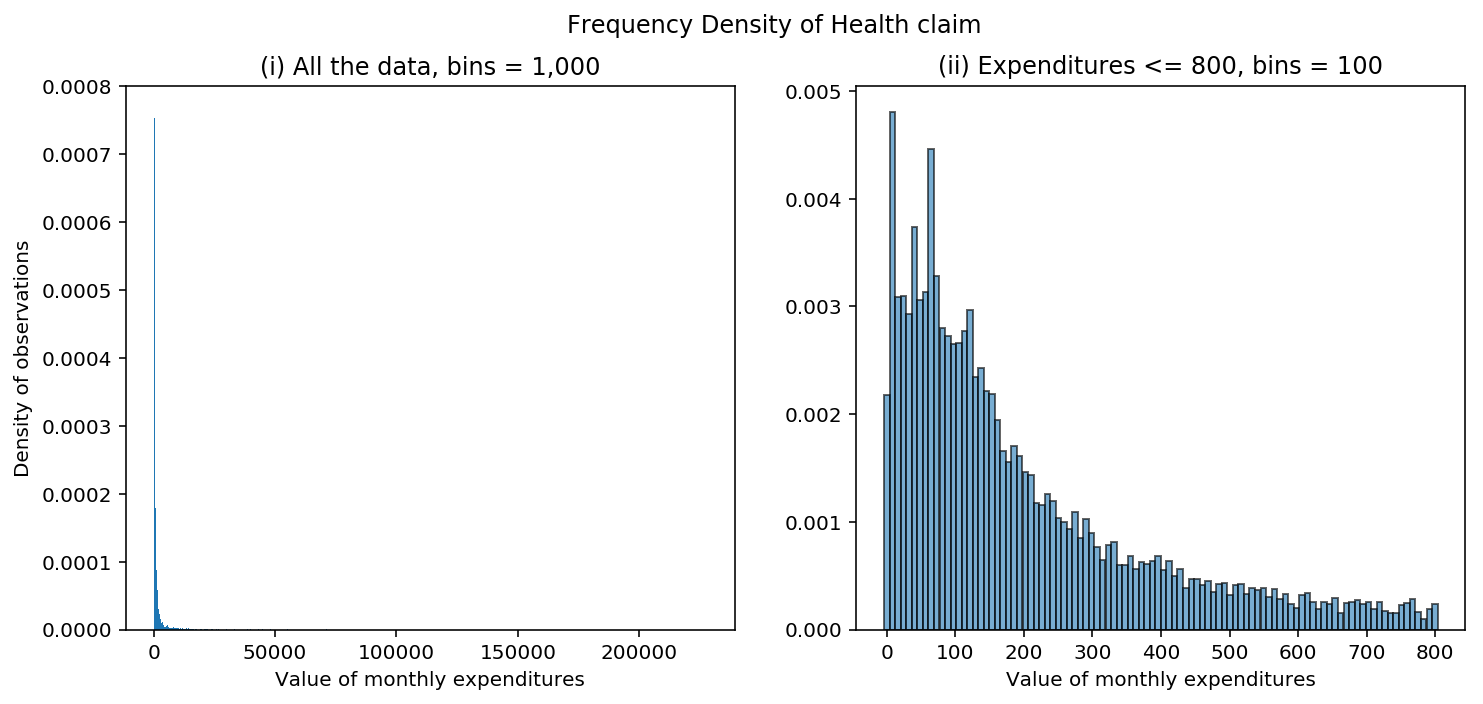

The area of Figure(i) :1.0000
The area of Figure(ii):0.8494


In [4]:
counts_800, bins_edge_800 = np.histogram(data1_800, bins = 100)
width_800 = bins_edge_800[1:] - bins_edge_800[:-1]
ratio = len(data1_800)/len(data1)
counts_800d = counts_800 * (ratio/(width_800[0]*counts_800.sum()))

fig, axes = plt.subplots(ncols = 2, figsize = (12,5))
counts_alld, bins_edge_alld, _ = axes[0].hist(data1, 1000, density = True)
axes[0].set_xlabel('Value of monthly expenditures')
axes[0].set_ylabel('Density of observations')
axes[0].set_ylim(0,0.0008)
axes[0].set_title('(i) All the data, bins = 1,000')

axes[1].bar(np.linspace(0,bins_edge_800[-1],100),height = counts_800d, 
            width = width_800[0], edgecolor = 'k',alpha = 0.6)
axes[1].set_title('(ii) Expenditures <= 800, bins = 100')
axes[1].set_xlabel('Value of monthly expenditures')
fig.suptitle('Frequency Density of Health claim');
plt.show();

width_all = bins_edge_alld[1:] - bins_edge_alld[:-1]

print('The area of Figure(i) :{0:.4f}'.format(np.dot(counts_alld, width_all)))
print('The area of Figure(ii):{0:.4f}'.format(np.dot(counts_800d, width_800)))

### (b)
The probability density function of gamma distribution is the following.

$$ \text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}},\quad x\in[0,\infty), \:\alpha,\beta>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$


In [5]:
def ga_pdf(xvals, alpha, beta): 
    pdf_vals = (1 / ((beta ** alpha) * special.gamma(alpha))) * (xvals ** (alpha - 1)) * (np.exp(-xvals/beta))
    return pdf_vals

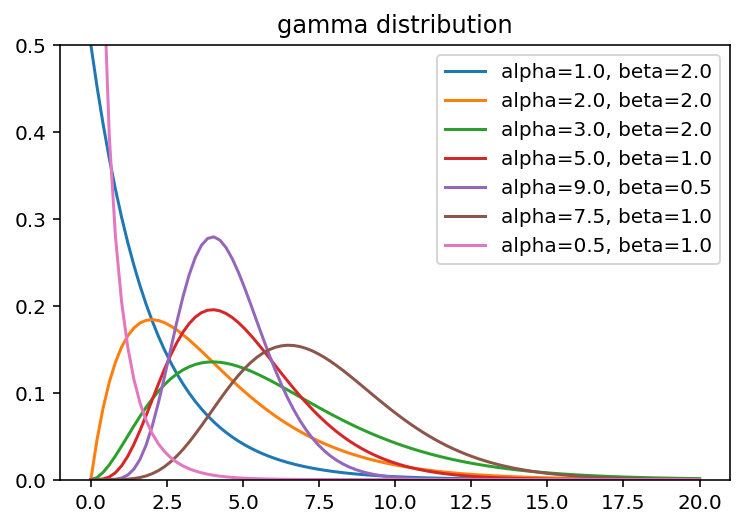

In [6]:
# What does the pdf of gamma distributin look like?
x  = np.linspace(1e-10, 20, 100)
al = [1.,2.,3.,5.,9.,7.5,0.5]
be = [2.,2.,2.,1.,0.5,1.,1.]
for a, b in zip(al,be):
    plt.plot(x,ga_pdf(x,a,b), label = 'alpha={0}, beta={1}'.format(a,b))
plt.legend()
plt.ylim(0,.5)
plt.title('gamma distribution')
plt.show();

In [7]:
def log_lik_ga(xval, alpha, beta):
    pdf_vals = ga_pdf(xval, alpha, beta)
    pdf_vals[pdf_vals < 1e-7] = 1e-7
    ln_pdf_val = np.log(pdf_vals)
    log_lik_val = ln_pdf_val.sum()
    
    return log_lik_val

In [8]:
def crit_(params, *args):   
    xvals, log_lik_ = args
    log_lik_val = log_lik_(xvals, *params)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [9]:
beta_init_ga   = np.var(data1) / np.mean(data1)
alpha_init_ga  = np.mean(data1) / beta_init_ga
params_init_ga = np.array([alpha_init_ga, beta_init_ga])
params_init_ga

array([3.28727967e-02, 2.19110647e+04])

In [10]:
result_ga = opt.minimize(crit_, params_init_ga, args = (data1, log_lik_ga), method = 'TNC', 
                         bounds = ((1e-7, None),(1e-7, None)), tol = 1e-12, options = {'maxiter':3000})
result_ga

     fun: 76003.26272910635
     jac: array([-0.00873115,  0.        ])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 149
     nit: 27
  status: 1
 success: True
       x: array([  0.7093048 , 552.40883947])

In [11]:
alpha_mle_ga, beta_mle_ga = result_ga.x
print('Estimated value for alpha: {0:.5f}'.format(alpha_mle_ga))
print('Estimated value for beta : {0:.3f}'.format(beta_mle_ga))
print('Log-likelihood           : {0:.3f}'.format(log_lik_ga(data1, alpha_mle_ga, beta_mle_ga)))

Estimated value for alpha: 0.70930
Estimated value for beta : 552.409
Log-likelihood           : -76003.263


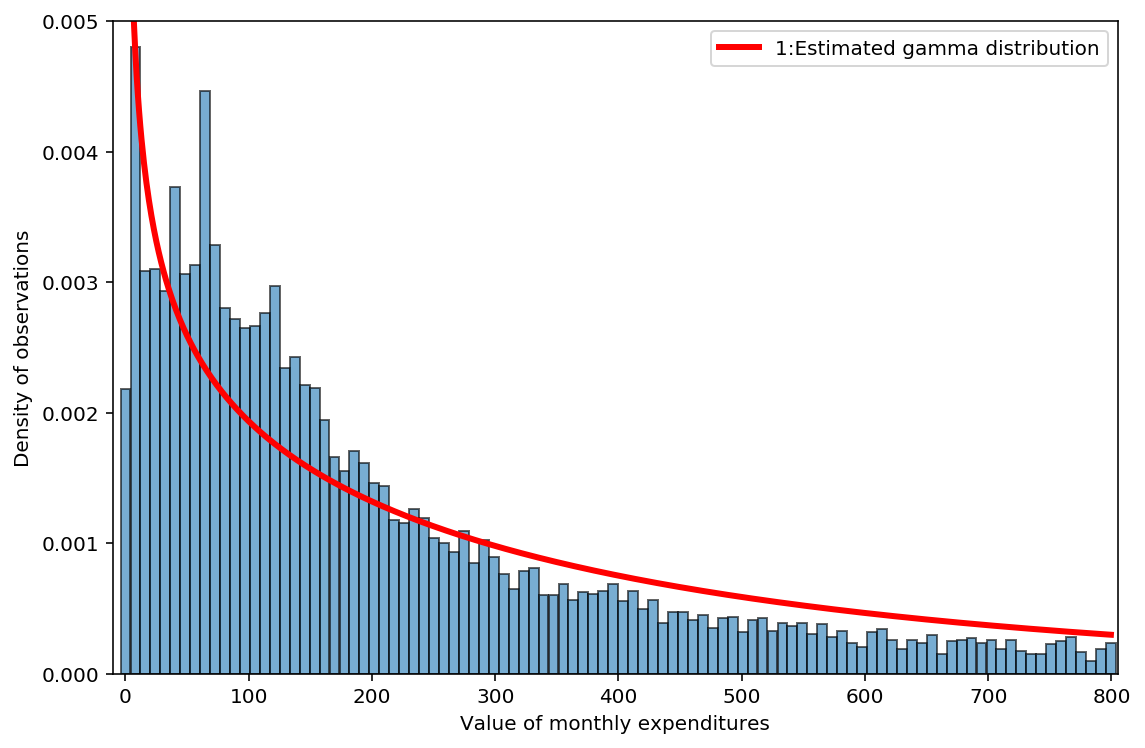

In [12]:
dist_point = np.linspace(1e-7, np.amax(data1_800), 800)
pdf_vals_ga = ga_pdf(dist_point, alpha_mle_ga, beta_mle_ga)

fig = plt.figure(figsize = (9,6))

plt.bar(np.linspace(0,bins_edge_800[-1],100),height = counts_800d, width = width_800[0], edgecolor = 'k',alpha = 0.6)
plt.xlabel('Value of monthly expenditures')
plt.ylabel('Density of observations')
plt.ylim(0, 0.005)
plt.xlim(-10,805)
plt.plot(dist_point, pdf_vals_ga, linewidth = 3, color = 'r', label = '1:Estimated gamma distribution')
plt.legend()
plt.show();

### (c)

The probability density function of generalized gamma distribution is the following.

$$ \text{(GG):}\quad f(x;\alpha,\beta,m) = \frac{m}{\beta^\alpha \Gamma\left(\frac{\alpha}{m}\right)}x^{\alpha-1}e^{-\left(\frac{x}{\beta}\right)^m},\quad x\in[0,\infty), \:\alpha,\beta,m>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$

In [13]:
def gg_pdf(xvals, alpha, beta, m): 
    Gamma = special.gamma(alpha/m)
    pdf_vals = ((m / (beta ** alpha * Gamma)) * (xvals ** (alpha - 1)) * (np.exp(-((xvals/beta)**m))))
    
    return pdf_vals

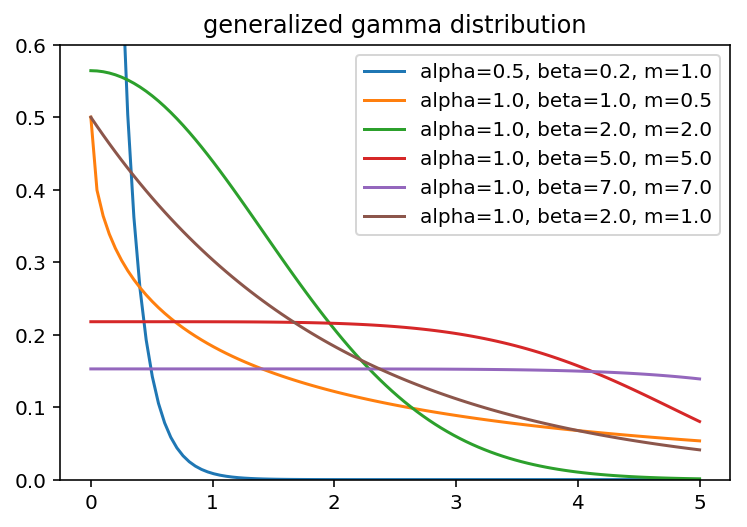

In [14]:
# What does the pdf of GG distributin look like?
x  = np.linspace(1e-10, 5, 100)
al = [0.5,1.,1.,1.,1.,1.]
be = [0.2,1.,2.,5.,7.,2.]
ma = [1.,0.5,2.,5.,7.,1.]
for a, b,m in zip(al,be,ma):
    plt.plot(x,gg_pdf(x,a,b,m), label = 'alpha={0}, beta={1}, m={2}'.format(a,b,m))
plt.legend()
plt.ylim(0,.6)
plt.title('generalized gamma distribution')
plt.show();

In [15]:
def log_lik_gg(xval, alpha, beta, m):
    pdf_vals = gg_pdf(xval, alpha, beta,m)
    pdf_vals[pdf_vals < 1e-7] = 1e-7
    ln_pdf_val = np.log(pdf_vals)
    log_lik_val = ln_pdf_val.sum()
    
    return log_lik_val

In [16]:
params_init_gg = np.array([alpha_mle_ga, beta_mle_ga, 1])
params_init_gg

array([  0.7093048 , 552.40883947,   1.        ])

In [17]:
result_gg = opt.minimize(crit_, params_init_gg, args = (data1, log_lik_gg), method = 'TNC', 
                         bounds = ((1e-7, None),(1e-7, None),(1e-7, None)),tol = 1e-12,options = {'maxiter':3000})
result_gg

     fun: 74902.08224052248
     jac: array([  6.10743882,   1.82772055, 988.78372228])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 762
     nit: 120
  status: 2
 success: True
       x: array([2.33437152e+00, 1.49986807e-03, 2.04400611e-01])

In [18]:
alpha_mle_gg, beta_mle_gg, m_mle_gg = result_gg.x
print('Estimated value for alpha: {0:.5f}'.format(alpha_mle_gg))
print('Estimated value for beta : {0:.6f}'.format(beta_mle_gg))
print('Estimated value for m    : {0:.5f}'.format(m_mle_gg))
print('Log-likelihood           : {0:.3f}'.format(log_lik_gg(data1, alpha_mle_gg, beta_mle_gg, m_mle_gg)))

Estimated value for alpha: 2.33437
Estimated value for beta : 0.001500
Estimated value for m    : 0.20440
Log-likelihood           : -74902.082


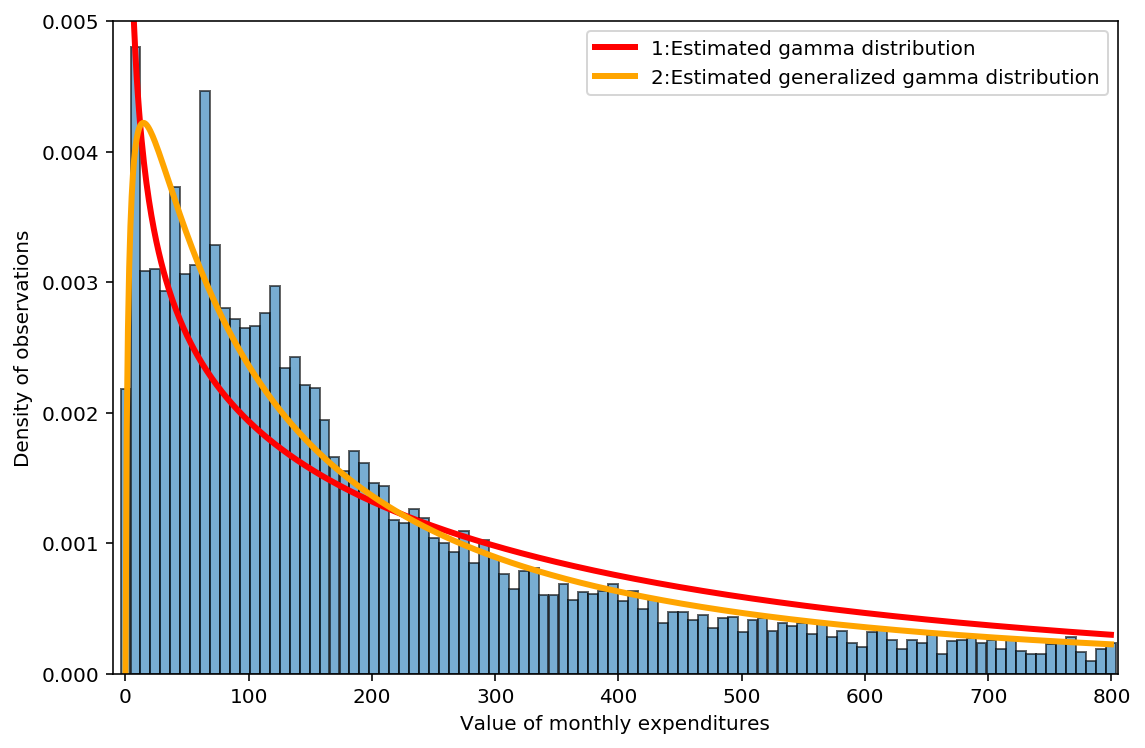

In [19]:
pdf_vals_gg = gg_pdf(dist_point, alpha_mle_gg, beta_mle_gg, m_mle_gg) 

fig = plt.figure(figsize = (9,6))

plt.bar(np.linspace(0,bins_edge_800[-1],100),height = counts_800d, width = width_800[0], edgecolor = 'k',alpha = 0.6)
plt.xlabel('Value of monthly expenditures')
plt.ylabel('Density of observations')
plt.ylim(0, 0.005)
plt.xlim(-10,805)
plt.plot(dist_point, pdf_vals_ga, linewidth = 3, color = 'r',      label = '1:Estimated gamma distribution')
plt.plot(dist_point, pdf_vals_gg, linewidth = 3, color = 'orange', label = '2:Estimated generalized gamma distribution')
plt.legend()
plt.show();

### (d)
$$ \text{(GB2):}\quad f(x;a,b,p,q) = \frac{a x^{ap-1}}{b^{ap}B(p,q)\left(1 + \left(\frac{x}{b}\right)^a\right)^{p+q}},\quad x\in[0,\infty), \:a,b,p,q>0 $$

$$ \quad\text{where}\quad B(v,w)\equiv\int_0^1 t^{v-1}(1-t)^{w-1}dt $$

In [20]:
def gb2_pdf(xvals, a, b, p, q):
    Beta = special.beta(p, q)
    pdf_vals = (a * xvals**(a*p-1))\
                / (b**(a*p) * Beta * ((1+(xvals/b)**a)**(p + q)))
    
    return pdf_vals

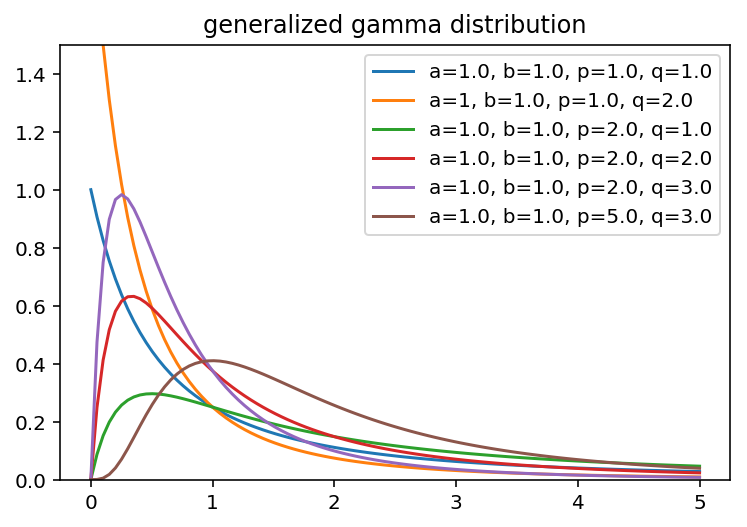

In [21]:
# What does the pdf of GG distributin look like?
x  = np.linspace(1e-10, 5, 100)
a_ = [1.,1,1.,1.,1.,1.]
b_ = [1.,1.,1.,1.,1.,1.]
p_ = [1.,1.,2.,2.,2.,5.]
q_ = [1.,2.,1.,2.,3.,3.]
for a, b, p, q in zip(a_, b_, p_, q_):
    plt.plot(x,gb2_pdf(x,a, b, p, q), label = 'a={0}, b={1}, p={2}, q={3}'.format(a, b, p, q))
plt.legend()
plt.ylim(0,1.5)
#plt.xlim(0,5)
plt.title('generalized gamma distribution')
plt.show();

In [22]:
def log_lik_gb2(xval, a, b, p, q):
    pdf_vals = gb2_pdf(xval, a, b, p, q)
    pdf_vals[pdf_vals < 1e-7] = 1e-7
    ln_pdf_val = np.log(pdf_vals)
    log_lik_val = ln_pdf_val.sum()
    
    return log_lik_val

By using the relationship between GB2 distribution and GG distribution, I obtained the initial guesses.

$$ GG(\alpha,\beta,m) = \lim_{q\rightarrow\infty}GB2\left(a=m,b=q^{1/m}\beta,p=\frac{\alpha}{m},q\right) $$


In [23]:
a_init = m_mle_gg
q_init = 10000
b_init = (q_init ** (1/m_mle_gg)) * beta_mle_gg
p_init = alpha_mle_gg / m_mle_gg

params_init = np.array([a_init, b_init, p_init, q_init])
params_init

array([2.04400611e-01, 5.56501320e+16, 1.14205702e+01, 1.00000000e+04])

In [24]:
result_gb2 = opt.minimize(crit_, params_init, args = (data1, log_lik_gb2), method = 'TNC', 
                         bounds = ((1e-7, None),(1e-7, None),(1e-7, None),(1e-7, None)),tol = 1e-12,options = {'maxiter':3000})
result_gb2

     fun: 74901.58153645953
     jac: array([-829.43297457,    0.        ,   10.57633199,   12.05626177])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 64
     nit: 3
  status: 2
 success: True
       x: array([2.04383384e-01, 5.56501320e+16, 1.14205996e+01, 9.99999637e+03])

In [25]:
a_mle_gb2, b_mle_gb2, p_mle_gb2, q_mle_gb2 = result_gb2.x
print('Estimated value for a : {0:.5f}'.format(a_mle_gb2))
print('Estimated value for b : {0:.3f}'.format(b_mle_gb2))
print('Estimated value for p : {0:.5f}'.format(p_mle_gb2))
print('Estimated value for q : {0:.5f}'.format(q_mle_gb2))
print('Log-likelihood        : {0:.3f}'.format(log_lik_gb2(data1, a_mle_gb2, b_mle_gb2, p_mle_gb2, q_mle_gb2)))

Estimated value for a : 0.20438
Estimated value for b : 55650132048512184.000
Estimated value for p : 11.42060
Estimated value for q : 9999.99637
Log-likelihood        : -74901.582


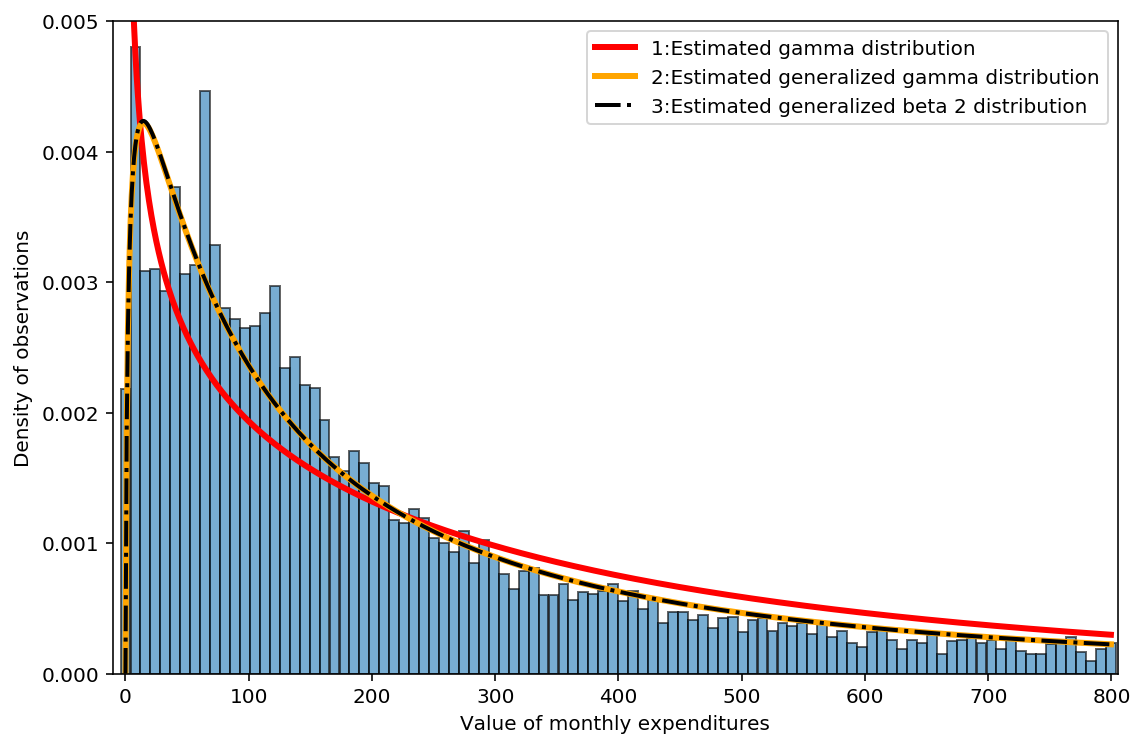

In [26]:
pdf_vals_gb2 = gb2_pdf(dist_point, a_mle_gb2, b_mle_gb2, p_mle_gb2, q_mle_gb2)

fig = plt.figure(figsize = (9,6))

plt.bar(np.linspace(0,bins_edge_800[-1],100),height = counts_800d, width = width_800[0], edgecolor = 'k',alpha = 0.6)
plt.xlabel('Value of monthly expenditures')
plt.ylabel('Density of observations')
plt.ylim(0, 0.005)
plt.xlim(-10,805)
plt.plot(dist_point, pdf_vals_ga,  linewidth = 3, color = 'r',     
         label = '1:Estimated gamma distribution')
plt.plot(dist_point, pdf_vals_gg,  linewidth = 3, color = 'orange', 
         label = '2:Estimated generalized gamma distribution')
plt.plot(dist_point, pdf_vals_gb2, linewidth = 2, color = 'k', ls = '-.', 
         label = '3:Estimated generalized beta 2 distribution')
plt.legend()
plt.show();

### (e)

In [27]:
log_lik_h0     = log_lik_gb2(data1, a_mle_gb2, b_mle_gb2, p_mle_gb2, q_mle_gb2)
log_lik_mle_ga = log_lik_ga(data1, alpha_mle_ga, beta_mle_ga)
log_lik_mle_gg = log_lik_gg(data1, alpha_mle_gg, beta_mle_gg, m_mle_gg)
print('Hypothesis value of log likelihood: {0:.4f}'.format(log_lik_h0))
print('Estimated MLE of GA               : {0:.4f}'.format(log_lik_mle_ga))
print('Estimated MLE of GG               : {0:.4f}'.format(log_lik_mle_gg))

LR_val_ga = 2 * (log_lik_h0 - log_lik_mle_ga)
LR_val_gg = 2 * (log_lik_h0 - log_lik_mle_gg)
print('\nLikelihood ratio for GA           : {0:.4f}'.format(LR_val_ga))
print('Likelihood ratio for GG           : {0:.4f}'.format(LR_val_gg))

pval_h0_ga = 1.0 - stats.chi2.cdf(LR_val_ga, 4)
pval_h0_gg = 1.0 - stats.chi2.cdf(LR_val_gg, 4)
print('\nchi squared of H0 with 4 dof p-value for GA: {0:.10f}'.format(pval_h0_ga))
print('chi squared of H0 with 4 dof p-value for GG: {0:.10f}'.format(pval_h0_ga))


Hypothesis value of log likelihood: -74901.5815
Estimated MLE of GA               : -76003.2627
Estimated MLE of GG               : -74902.0822

Likelihood ratio for GA           : 2203.3624
Likelihood ratio for GG           : 1.0014

chi squared of H0 with 4 dof p-value for GA: 0.0000000000
chi squared of H0 with 4 dof p-value for GG: 0.0000000000


### (f)

In [28]:
prob_gb2 = 1 - integrate.quad(lambda x: gb2_pdf(x, a_mle_gb2, b_mle_gb2, p_mle_gb2, q_mle_gb2), 0, 1000)[0]
print('The probability that I have a monthly health care claim of more than $1000 is {0:.3%} implied from GB2 distribution'\
      .format(prob_gb2))


The probability that I have a monthly health care claim of more than $1000 is 11.791% implied from GB2 distribution


In [29]:
prob_ga = 1 - stats.gamma.cdf(1000, alpha_mle_ga, scale = beta_mle_ga)
print('The probability that I have a monthly health care claim of more than $1000 is {0:.3%} implied from GA distribution'\
      .format(prob_ga))


The probability that I have a monthly health care claim of more than $1000 is 9.614% implied from GA distribution


## Question 2

### (a)

In [30]:
data2 = np.loadtxt('MacroSeries.txt', delimiter=',')

In [31]:
wt = data2[:,2]
kt = data2[:,1]

In [32]:
def tfp_w(wt, kt, alpha):
    Zt  = np.log(wt) - np.log((1 - alpha) * kt ** alpha)
    
    return Zt

In [33]:
def ar1(Z, mu, rho):
    Z0 = np.insert(Z, 0, mu)
    Z_ar =  rho * Z0[:-1] + (1 - rho) * mu
    
    return Z_ar

In [34]:
def log_lik_norm(zt, z_ar, sigma):    
    pdf_vals = stats.norm.pdf(zt, loc = z_ar, scale = sigma)
    ln_pdf_val = np.log(pdf_vals)
    log_lik_val = ln_pdf_val.sum()
    
    return log_lik_val

In [35]:
def crit_zt1(params, *args):
    alpha, rho, mu, sigma = params
    wt, kt = args
    
    Zt   = tfp_w(wt, kt, alpha)
    Z_ar = ar1(Zt, mu, rho)
    
    log_lik_val = log_lik_norm(Zt, Z_ar, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [36]:
alpha_init = 0.5
rho_init   = 0.0
mu_init    = tfp_w(wt, kt, alpha_init)[0]
sigma_init = np.std(tfp_w(wt, kt, alpha_init))

params_init = np.array([alpha_init, rho_init, mu_init, sigma_init])
params_init

array([0.5       , 0.        , 8.91896789, 0.12606681])

In [37]:
result_a = opt.minimize(crit_zt1, params_init, args = (wt, kt), method = 'L-BFGS-B', 
                         bounds = ((1e-10, 1.-1e-10), (-1.+1e-10, 1.-1e-10), (1e-10, None),(1e-10, None)))
result_a

      fun: -96.65373750147646
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00474358, -0.00016627, -0.00037517,  0.00282796])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 260
      nit: 38
   status: 0
  success: True
        x: array([0.70204063, 0.47985515, 6.25471135, 0.09204528])

In [38]:
alpha_mle_a, rho_mle_a, mu_mle_a, sigma_mle_a = result_a.x
print('Estimated values \n  - alpha:{0:.4f} \n  - rho:  {1:.4f} \n  - mu:   {2:.4f} \n  - sigma:{3:.4f}'\
      .format((alpha_mle_a), (rho_mle_a), (mu_mle_a), (sigma_mle_a)))
print('\nInverse Hessian Variance-Covariance Matrix: VCV =\n', result_a.hess_inv.todense())

Estimated values 
  - alpha:0.7020 
  - rho:  0.4799 
  - mu:   6.2547 
  - sigma:0.0920

Inverse Hessian Variance-Covariance Matrix: VCV =
 [[ 8.48087793e+01 -9.76499482e+01 -1.02729534e+03  2.25241597e+00]
 [-9.76499482e+01  1.12752049e+02  1.18280453e+03 -2.61831764e+00]
 [-1.02729534e+03  1.18280453e+03  1.24437149e+04 -2.72822989e+01]
 [ 2.25241597e+00 -2.61831764e+00 -2.72822989e+01  6.38663320e-02]]


### (b)

In [39]:
rt = data2[:,3]

In [40]:
def tfp_r(rt, kt, alpha):
    Zt = np.log(rt) - np.log(alpha * kt ** (alpha - 1))
    
    return Zt

In [41]:
def crit_zt2(params, *args):
    alpha, rho, mu, sigma = params
    rt, kt = args
    
    Zt   = tfp_r(rt, kt, alpha)
    Z_ar = ar1(Zt, mu, rho)
    
    log_lik_val = log_lik_norm(Zt, Z_ar, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [42]:
alpha_init = 0.5
rho_init   = 0.0
mu_init    = tfp_r(rt, kt, alpha_init)[0]
sigma_init = np.std(tfp_r(rt, kt, alpha_init))

params_init = np.array([alpha_init, rho_init, mu_init, sigma_init])
params_init

array([0.5       , 0.        , 8.59619449, 0.12606681])

In [43]:
result_b = opt.minimize(crit_zt2, params_init, args = (rt, kt), method = 'L-BFGS-B', 
                         bounds = ((1e-10, 1.-1e-10), (-1.+1e-10, 1.-1e-10), (1e-10, None),(1e-10, None)))
result_b

      fun: -96.65372189805174
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04426255,  0.0050818 , -0.00179909,  0.00644178])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 135
      nit: 22
   status: 0
  success: True
        x: array([0.70085365, 0.48128123, 5.09535993, 0.09204545])

In [44]:
alpha_mle_b, rho_mle_b, mu_mle_b, sigma_mle_b = result_b.x
print('Estimated values \n  - alpha:{0:.4f} \n  - rho:  {1:.4f} \n  - mu:   {2:.4f} \n  - sigma:{3:.4f}'\
      .format((alpha_mle_b), (rho_mle_b), (mu_mle_b), (sigma_mle_b)))
print('\nInverse Hessian Variance-Covariance Matrix: VCV =\n', result_b.hess_inv.todense())

Estimated values 
  - alpha:0.7009 
  - rho:  0.4813 
  - mu:   5.0954 
  - sigma:0.0920

Inverse Hessian Variance-Covariance Matrix: VCV =
 [[  1.17181545   2.05035665 -22.10639999   1.20363206]
 [  2.05035665   5.21901696 -39.50086398   2.63968781]
 [-22.10639999 -39.50086398 417.45481405 -22.97663845]
 [  1.20363206   2.63968781 -22.97663845   1.41189401]]


### (c)

In [45]:
z    = tfp_r(rt = 1, kt = 7.5 * 1e+6, alpha = alpha_mle_a)
z_ar =  rho_mle_a * 10 + (1 - rho_mle_a) * mu_mle_a
p    = 1 - stats.norm.cdf(z, loc = z_ar, scale = sigma_mle_a)

In [46]:
print('The probability that interest rate this period will be greater than rt = 1: {}'.format(p))

The probability that interest rate this period will be greater than rt = 1: 1.0
